In [1]:
import scipy as sp
from scipy.integrate import odeint
import scipy.linalg as la
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline
sp.set_printoptions(precision=3, linewidth=300)

In [15]:
Id = 7.06
Ip = 13.69
k = 2.97*10e5
w = 600 #frequência natural
ksi = 0.9
c=2*ksi*((Id*k)**0.5)
omega = sp.linspace(0, 1000, 1000)

In [16]:
M = sp.array([[Id,0],
              [0,Id]])
G = sp.array([[0,Ip],
              [-Ip,0]])
C = sp.array([[0,c],
              [c,0]])
Kt = sp.array([[k,0],
              [0,k]])
I = sp.eye(len(Kt))
Z = sp.zeros_like(Kt)
invM = la.inv(M)

A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-invM @ Kt, -invM @ (G*w+C)])])


A

array([[  0.000e+00,   0.000e+00,   1.000e+00,   0.000e+00],
       [  0.000e+00,   0.000e+00,   0.000e+00,   1.000e+00],
       [ -4.207e+05,   0.000e+00,   0.000e+00,  -2.331e+03],
       [  0.000e+00,  -4.207e+05,  -4.021e+00,   0.000e+00]])

In [17]:
va = []
vb = []
for O in omega:
    a, b = la.inv(((-O**2)*M+1.j*O*(C+O*G)+Kt))@ sp.array([[(Id-Ip)*(O**2)],
                                                                  [(Id-Ip)*(O**2)]])
    va.append(sp.absolute(a))
    vb.append(sp.absolute(b))

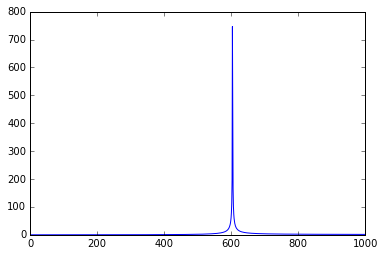

In [18]:
plt.plot(omega, va)

In [19]:
A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-invM @ Kt, -invM @ (G*w+C)])])

def func(x, t):
    
    # definir x1 e x2:
    a1, b1, a2, b2 = x
    
    # calcular dxdt
    'dxdt = A @ [a1,b1,a2,b2] + [0,0,(1-Id/Ip)*(w**2)*sp.cos(w*t),(1-Id/Ip)*(w**2)*sp.sin(w*t)]'
    dxdt = [a2,b2,a1*(-k/Id)+(b2*(-Ip*w+c)/Id)+(Id-Ip)*(w**2)*sp.cos(-w*t),b1*(-k/Id)+(a2*(Ip*w+c)/Id)+(Id-Ip)*(w**2)*sp.sin(w*t)]
    return dxdt

In [20]:
# Condições iniciais
b10=0
b20=0
a10=0
a20=0

#Criar array com condições iniciais
z0 = [a10,a20,b10,b20]

# Criar array com o tempo
tf = 20
t = sp.linspace(0, tf, 5000)

In [21]:
sol = odeint(func, z0, t)
A=sol[:,(0,1)]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: overflow encountered in double_scalars
C:\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:218: ODEintWarning: Excess accuracy requested (tolerances too small). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


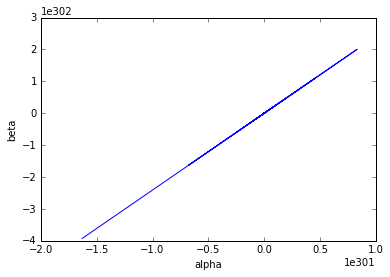

In [22]:
plt.plot(sol[:,0],sol[:,1])
plt.legend()
plt.xlabel('alpha')
plt.ylabel('beta')

In [23]:
A = sp.vstack([sp.hstack([         Z,            I]),
               sp.hstack([-invM @ Kt, -invM @ (G*w+C)])])

def func(x, t):
    
    # definir x1 e x2:
    a1, b1, a2, b2 = x
    
    # calcular dxdt
    'dxdt = A @ [a1,b1,a2,b2] + [0,0,(1-Id/Ip)*(w**2)*sp.cos(w*t),(1-Id/Ip)*(w**2)*sp.sin(w*t)]'
    dxdt = [a2,b2,a1*(-k/Id)+(b2*(-Ip*w)/Id)+(Id-Ip)*(w**2)*sp.cos(-w*t),b1*(-k/Id)+(a2*(Ip*w)/Id)+(Id-Ip)*(w**2)*sp.sin(w*t)]
    return dxdt

In [24]:
# Condições iniciais
b10=0
b20=0
a10=0
a20=0

#Criar array com condições iniciais
z0 = [a10,a20,b10,b20]

# Criar array com o tempo
tf = 20
t = sp.linspace(0, tf, 5000)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


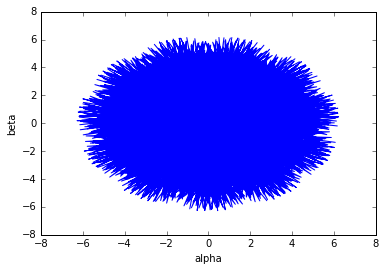

In [25]:
sol = odeint(func, z0, t)
A=sol[:,(0,1)]
plt.plot(sol[:,0],sol[:,1])
plt.legend()
plt.xlabel('alpha')
plt.ylabel('beta')